In [18]:
import torchvision
import torch.nn as nn
from torchvision.utils import save_image, make_grid
import json
# from src.model import Net
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.chdir('..')

In [3]:

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True)
                                

In [4]:
def _subsample_by_classes(all_examples, labels, num_per_class=None):
    if num_per_class is None:
        return all_examples

    examples = {label: [] for label in labels}
    for example in all_examples:
        if example[1] in labels:
            examples[example[1]].append(example)

    picked_examples = []
    for label in labels:
        examples_with_label = examples[label][:num_per_class[label]]
        picked_examples.extend(examples_with_label)

        print(f'number of examples with label \'{label}\': '
            f'{len(examples_with_label)}')

    return picked_examples

In [5]:
trainset_sampled = _subsample_by_classes(trainset, [0,1,2,3,4,5,6,7,8,9], [100]*10)

number of examples with label '0': 100
number of examples with label '1': 100
number of examples with label '2': 100
number of examples with label '3': 100
number of examples with label '4': 100
number of examples with label '5': 100
number of examples with label '6': 100
number of examples with label '7': 100
number of examples with label '8': 100
number of examples with label '9': 100


In [7]:
# JSON file
with open ('outputs/mnist/IF_mnist_devId_1_epoch_99_2022-08-10-01-32-50.json', "r") as f:
     data = json.loads(f.read())


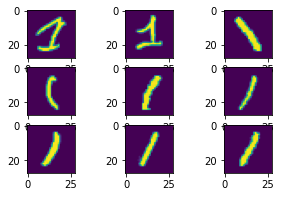

In [8]:
fig = plt.figure(figsize=(5, 3))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data['helpful'][i]][0])

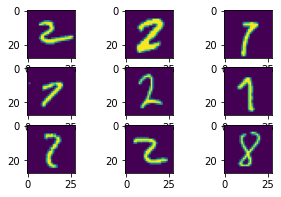

In [9]:
fig = plt.figure(figsize=(5, 3))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data['harmful'][i]][0])

In [11]:
# JSON file
with open ('outputs/mnist/Percy_mnist_devId_1_2022-08-09-13-23-43.json', "r") as f:
     data_groundtruth = json.loads(f.read())


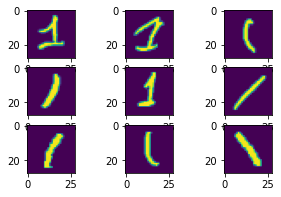

In [12]:
fig = plt.figure(figsize=(5, 3))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_groundtruth['helpful'][i]][0])

In [20]:
x = data_groundtruth['influence']
y = data['influence']

Text(0.5, 1.0, 'correlation 0.73')

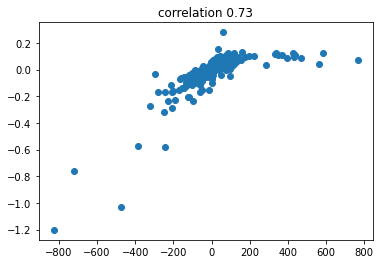

In [45]:
plt.scatter(x,y)
plt.title(f"correlation {Correlation}")

In [39]:
Correlation

{0.73}

In [27]:
len(y)

1000

In [43]:
np.corrcoef(x,y)[0,1]

0.7326369164189004

In [44]:
Correlation = np.round(np.corrcoef(x,y)[0,1], 2)

In [13]:
data_groundtruth['influence']

[10.05298466095637,
 1.0893476260245918,
 -2.7201793839309314,
 0.08763839851455993,
 -0.433729921932033,
 -0.27186998058309203,
 -1.0547498069421135,
 2.112335233056667,
 -1.960331919928611,
 0.2081821323368669,
 -1.4042915589235558,
 -0.5384256045981969,
 -0.18740214837258995,
 -0.07483692021915256,
 -0.28353252826027414,
 -0.9417081190784118,
 0.0036147807715795344,
 -1.477652221658162,
 -0.6998365246350777,
 -2.4857610183059746,
 -0.21969751417431704,
 -4.780837955859246,
 -0.9090352510797466,
 1.9572957720988113,
 -4.700689709766322,
 -0.38593733651284995,
 3.686591618421236,
 -1.037298383337607,
 -6.983622330840575,
 -1.1444777256655063,
 16.494144495636153,
 0.005529490172805573,
 -0.2415289594322079,
 0.07278380707318033,
 -0.05514878839777291,
 -0.2996967593629172,
 0.15574472980221238,
 -0.03190838502878613,
 -0.21788709876500872,
 -0.02451995210961204,
 -0.0994270651412027,
 -0.21751891778077675,
 -1.8999445088725229,
 -0.5382435506323942,
 -0.5223002444430462,
 -0.754990249